# Thống Kê

# Crawl data

In [1]:
import requests
import csv

# Hàm để lấy dữ liệu từ API
def get_team_data(team_id, tournament_id, season_id):
    url = f"https://sofascore.p.rapidapi.com/teams/get-player-statistics?teamId={team_id}&tournamentId={tournament_id}&seasonId={season_id}&type=overall"
    headers = {
        'x-rapidapi-host': 'sofascore.p.rapidapi.com',
        'x-rapidapi-key': '5fa1b3ec61msh748c83f0ec34ff4p18fe14jsn062670fd057e'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data: {response.status_code}")
        return None

# Nhập thông tin từ người dùng
team_id = input("Enter the team ID: ")
tournament_id = input("Enter the tournament ID: ")
season_id = input("Enter the season ID: ")

# Lấy dữ liệu từ API
data = get_team_data(team_id, tournament_id, season_id)

# Kiểm tra nếu dữ liệu không phải là None
if data:
    player_stats = {}

    # Các khóa cần trích xuất
    keys = [
        'rating', 'goals', 'assists', 'totalShots', 'shotsOnTarget',
        'accuratePasses', 'keyPasses', 'accurateLongBalls',
        'successfulDribbles', 'tackles', 'interceptions'
    ]

    for key in keys:
        for player_info in data.get('topPlayers', {}).get(key, []):
            player = player_info.get('player', {})
            statistics = player_info.get('statistics', {})
            player_name = player.get('name')
            
            if player_name not in player_stats:
                player_stats[player_name] = {
                    'name': player_name,
                    'position': player.get('position'),
                    'type': statistics.get('type'),
                    'appearances': statistics.get('appearances')
                }
            
            player_stats[player_name][key] = statistics.get(key)

    # Tạo tập hợp các khóa duy nhất
    fieldnames = set()
    for stats in player_stats.values():
        fieldnames.update(stats.keys())
    fieldnames = list(fieldnames)

    # Đảm bảo "name" ở đầu tiên
    if 'name' in fieldnames:
        fieldnames.remove('name')
    fieldnames = ['name'] + fieldnames

    # Tên file CSV
    filename = f"{team_id}_{tournament_id}_{season_id}.csv"

    # Lưu dữ liệu vào file CSV
    with open(filename, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(player_stats.values())
    
    print(f"Data saved to {filename}")
else:
    print("No data available.")

Data saved to 35_17_61627.csv


# import thư viện và đọc dữ liệu

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Yêu cầu người dùng nhập tên file CSV từ bàn phím
file_name = input("Nhập tên file CSV (bao gồm phần mở rộng): ")

# Đọc dữ liệu từ file CSV
data = pd.read_csv(file_name)

# Loại bỏ các giá trị NaN để tránh lỗi trong phân tích
data_cleaned = data.dropna()


# Vẽ biểu đồ tổng số bàn thắng, kiến tạo, pha tắc bóng, và lần ra sân

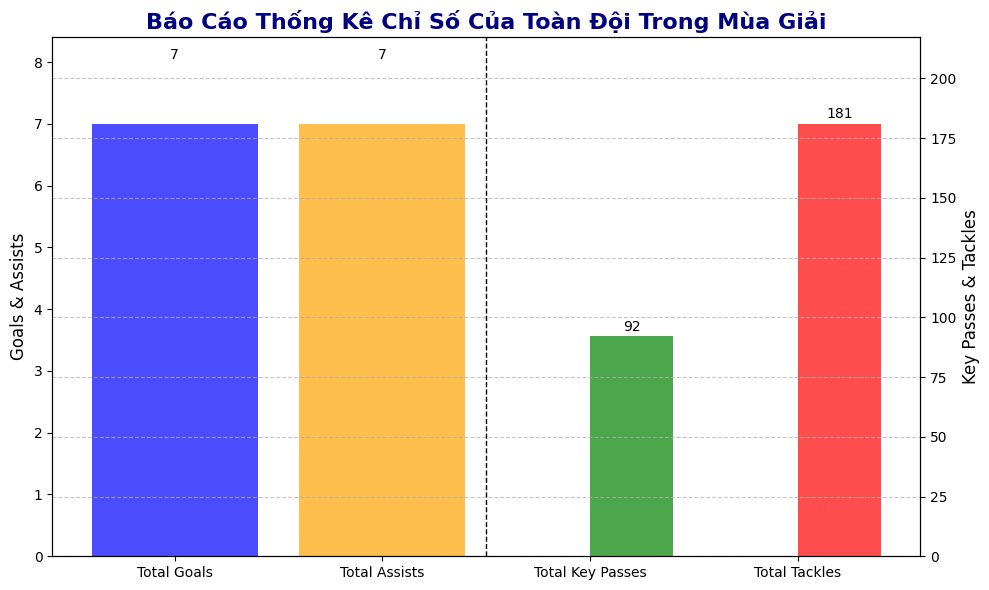

In [3]:
# Chuyển đổi kiểu dữ liệu cho các chỉ số nếu cần
data.loc[:, 'goals'] = pd.to_numeric(data['goals'], errors='coerce')
data.loc[:, 'assists'] = pd.to_numeric(data['assists'], errors='coerce')
data.loc[:, 'keyPasses'] = pd.to_numeric(data['keyPasses'], errors='coerce')
data.loc[:, 'tackles'] = pd.to_numeric(data['tackles'], errors='coerce')

# Tạo báo cáo thống kê
report = {
    'Total Goals': data['goals'].sum(),
    'Total Assists': data['assists'].sum(),
    'Total Key Passes': data['keyPasses'].sum(),
    'Total Tackles': data['tackles'].sum(),
}

# Tạo biểu đồ cho các chỉ số tổng quát
fig, ax1 = plt.subplots(figsize=(10, 6))

# Biểu đồ cho Goals và Assists
goals_bars = ax1.bar(['Total Goals', 'Total Assists'], 
                      [report['Total Goals'], report['Total Assists']], 
                      color=['blue', 'orange'], alpha=0.7)
ax1.set_ylabel('Goals & Assists', color='black', fontsize=12)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(report['Total Goals'], report['Total Assists']) * 1.2)

# Thêm giá trị lên trên các cột của Goals và Assists
for bar in goals_bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 1, 
             f'{yval:.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Tạo một trục y thứ hai cho Key Passes và Tackles
ax2 = ax1.twinx()
tackles_bars = ax2.bar(['Total Key Passes', 'Total Tackles'], 
                        [report['Total Key Passes'], report['Total Tackles']], 
                        color=['green', 'red'], alpha=0.7, width=0.4, align='edge')
ax2.set_ylabel('Key Passes & Tackles', color='black', fontsize=12)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(report['Total Key Passes'], report['Total Tackles']) * 1.2)

# Thêm giá trị lên trên các cột của Key Passes và Tackles
for bar in tackles_bars:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 1, 
             f'{yval:.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Vẽ đường ngăn cách giữa các nhóm cột
plt.axvline(x=1.5, color='black', linestyle='--', linewidth=1)

# Thiết lập tiêu đề và hiển thị biểu đồ
plt.title('Báo Cáo Thống Kê Chỉ Số Của Toàn Đội Trong Mùa Giải', fontsize=16, fontweight='bold', color='navy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

# Tính toán và vẽ biểu đồ cầu thủ ghi bàn nhiều nhất

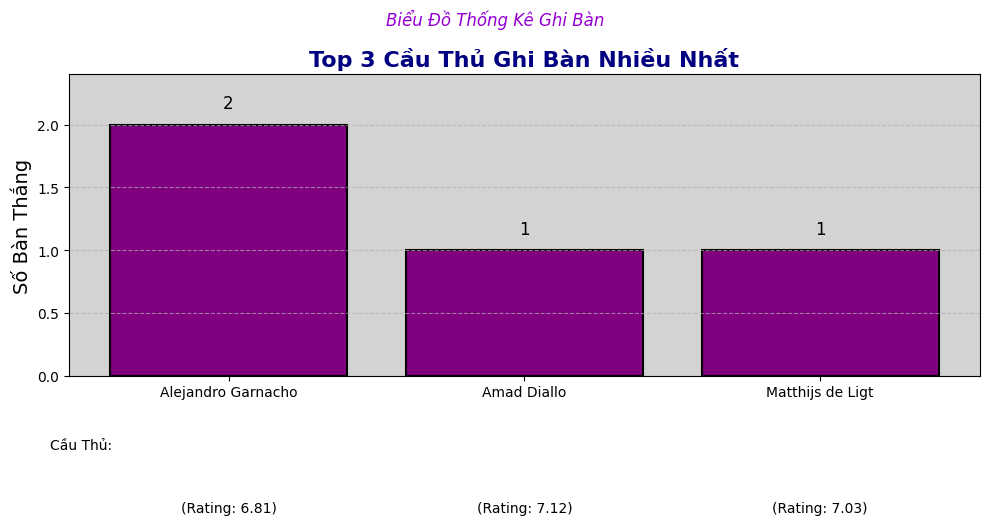

Top 3 cầu thủ ghi bàn nhiều nhất:
Tên: Alejandro Garnacho, Số bàn thắng: 2.0, Điểm đánh giá: 6.81
Tên: Amad Diallo, Số bàn thắng: 1.0, Điểm đánh giá: 7.12
Tên: Matthijs de Ligt, Số bàn thắng: 1.0, Điểm đánh giá: 7.03


In [4]:
# Chuyển đổi kiểu dữ liệu cho chỉ số goals
data.loc[:, 'goals'] = pd.to_numeric(data['goals'], errors='coerce')

# Sắp xếp DataFrame theo chỉ số goals theo thứ tự giảm dần
sorted_goals = data.sort_values(by='goals', ascending=False)

# Tính toán top 3 cầu thủ ghi bàn nhiều nhất
top_scorers = sorted_goals.head(3)

# Vẽ biểu đồ cho top 3 cầu thủ ghi bàn nhiều nhất
plt.figure(figsize=(10, 6))
bars = plt.bar(top_scorers['name'], top_scorers['goals'], color='purple', edgecolor='black', linewidth=1.5)
plt.title('Top 3 Cầu Thủ Ghi Bàn Nhiều Nhất', fontsize=16, fontweight='bold', color='navy')
plt.ylabel('Số Bàn Thắng', fontsize=14)
plt.ylim(0, top_scorers['goals'].max() * 1.2)  # Thiết lập giới hạn trục y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm giá trị bàn thắng lên trên các cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.0f}', 
             ha='center', va='bottom', fontsize=12, color='black')

# Thêm nhãn rating bên dưới tên cầu thủ
for index, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, -1, f'(Rating: {top_scorers["rating"].iloc[index]:.2f})', 
             ha='center', va='top', fontsize=10, color='black')

# Thêm nhãn cho trục x ở vị trí mong muốn
plt.text(-0.5, -0.5, 'Cầu Thủ:', ha='center', va='top', fontsize=10, color='black')

# Chỉnh sửa độ sáng của nền
plt.gca().set_facecolor('lightgray')

# Thêm một tiêu đề phụ (subtitle)
plt.suptitle('Biểu Đồ Thống Kê Ghi Bàn', fontsize=12, fontstyle='italic', color='darkviolet')

# Hiển thị biểu đồ
plt.tight_layout()  # Đảm bảo không bị chồng chéo
plt.show()

# In ra thông tin top 3 cầu thủ ghi bàn nhiều nhất
print("Top 3 cầu thủ ghi bàn nhiều nhất:")
for index, row in top_scorers.iterrows():
    print(f"Tên: {row['name']}, Số bàn thắng: {row['goals']}, Điểm đánh giá: {row['rating']:.2f}")

# Tính toán và vẽ biểu đồ cầu thủ kiến tạo nhiều nhất

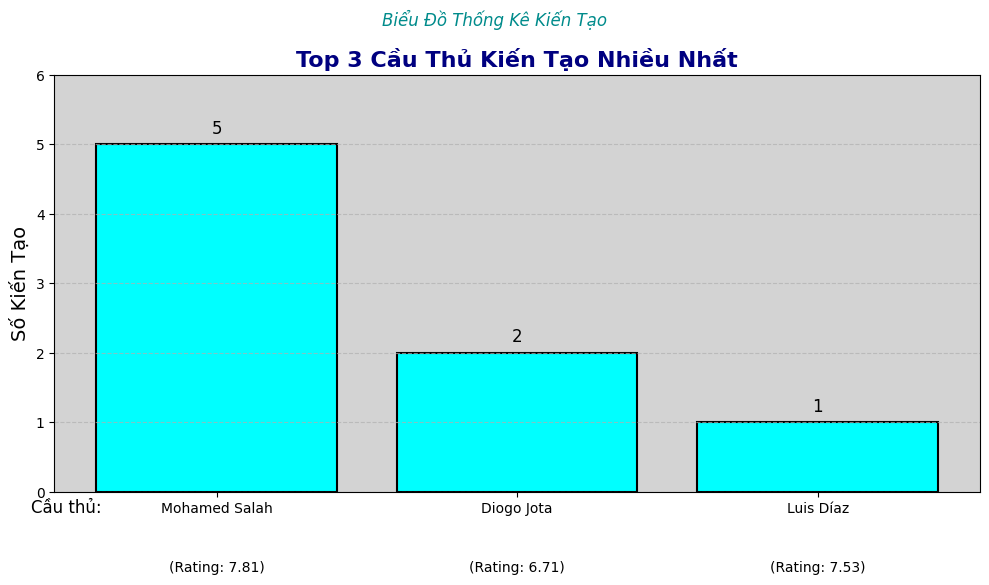

Top 3 cầu thủ kiến tạo nhiều nhất:
Tên: Mohamed Salah, Số kiến tạo: 5.0, Điểm đánh giá: 7.81
Tên: Diogo Jota, Số kiến tạo: 2.0, Điểm đánh giá: 6.71
Tên: Luis Díaz, Số kiến tạo: 1.0, Điểm đánh giá: 7.53


In [6]:
# Chuyển đổi kiểu dữ liệu cho chỉ số assists
data.loc[:, 'assists'] = pd.to_numeric(data['assists'], errors='coerce')

# Sắp xếp DataFrame theo chỉ số assists theo thứ tự giảm dần
sorted_assists = data.sort_values(by='assists', ascending=False)

# Tính toán top 3 cầu thủ kiến tạo nhiều nhất
top_assist_providers = sorted_assists.head(3)

# Vẽ biểu đồ cho top 3 cầu thủ kiến tạo nhiều nhất
plt.figure(figsize=(10, 6))
bars = plt.bar(top_assist_providers['name'], top_assist_providers['assists'], color='cyan', edgecolor='black', linewidth=1.5)
plt.title('Top 3 Cầu Thủ Kiến Tạo Nhiều Nhất', fontsize=16, fontweight='bold', color='navy')
plt.ylabel('Số Kiến Tạo', fontsize=14)
plt.ylim(0, top_assist_providers['assists'].max() * 1.2)  # Thiết lập giới hạn trục y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm giá trị kiến tạo lên trên các cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.0f}', 
             ha='center', va='bottom', fontsize=12, color='black')

# Thêm nhãn rating bên dưới tên cầu thủ
for index, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, -1, f'(Rating: {top_assist_providers["rating"].iloc[index]:.2f})', 
             ha='center', va='top', fontsize=10, color='black')

# Thêm nhãn cho trục x ở vị trí mong muốn
plt.text(-0.5, -0.1, 'Cầu thủ:', ha='center', va='top', fontsize=12, color='black')

# Chỉnh sửa độ sáng của nền
plt.gca().set_facecolor('lightgray')

# Thêm một tiêu đề phụ (subtitle)
plt.suptitle('Biểu Đồ Thống Kê Kiến Tạo', fontsize=12, fontstyle='italic', color='darkcyan')

# Hiển thị biểu đồ
plt.tight_layout()  # Đảm bảo không bị chồng chéo
plt.show()

# In ra thông tin top 3 cầu thủ kiến tạo nhiều nhất
print("Top 3 cầu thủ kiến tạo nhiều nhất:")
for index, row in top_assist_providers.iterrows():
    print(f"Tên: {row['name']}, Số kiến tạo: {row['assists']}, Điểm đánh giá: {row['rating']:.2f}")

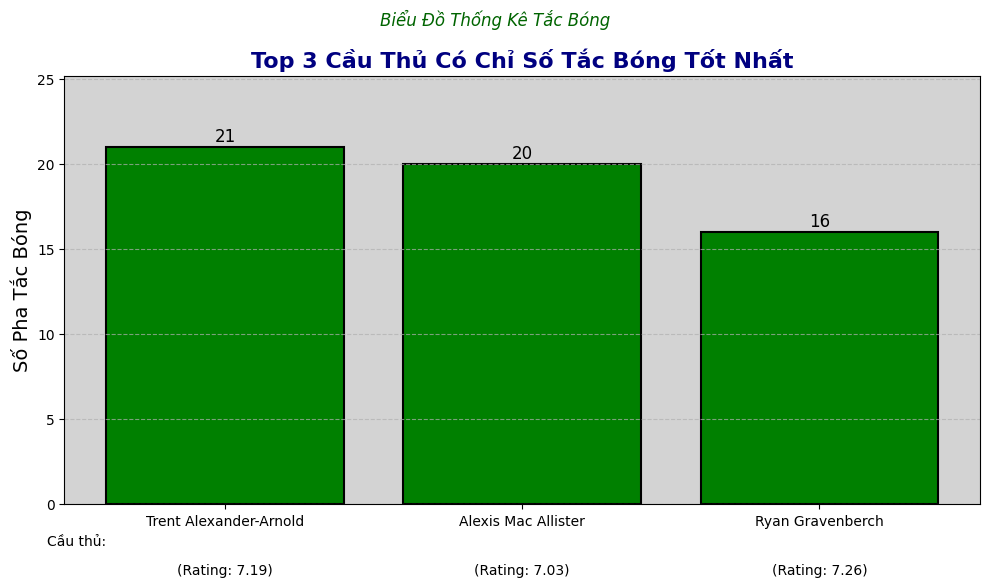

Top 3 cầu thủ có chỉ số đánh chặn tốt nhất:
Tên: Trent Alexander-Arnold, Số pha tắc bóng: 21.0, Điểm đánh giá: 7.19
Tên: Alexis Mac Allister, Số pha tắc bóng: 20.0, Điểm đánh giá: 7.03
Tên: Ryan Gravenberch, Số pha tắc bóng: 16.0, Điểm đánh giá: 7.26


In [7]:
# Chuyển đổi kiểu dữ liệu cho chỉ số tackles
data_cleaned.loc[:, 'tackles'] = pd.to_numeric(data_cleaned['tackles'], errors='coerce')

# Sắp xếp DataFrame theo chỉ số tackles theo thứ tự giảm dần
sorted_tackles = data.sort_values(by='tackles', ascending=False)

# Tính toán top 3 cầu thủ có chỉ số tackles tốt nhất
top_tacklers = sorted_tackles.head(3)

# Vẽ biểu đồ cho top 3 cầu thủ có chỉ số tắc bóng tốt nhất
plt.figure(figsize=(10, 6))
bars = plt.bar(top_tacklers['name'], top_tacklers['tackles'], color='green', edgecolor='black', linewidth=1.5)
plt.title('Top 3 Cầu Thủ Có Chỉ Số Tắc Bóng Tốt Nhất', fontsize=16, fontweight='bold', color='navy')
plt.ylabel('Số Pha Tắc Bóng', fontsize=14)
plt.ylim(0, top_tacklers['tackles'].max() * 1.2)  # Thiết lập giới hạn trục y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm giá trị tackles lên trên các cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.0f}', 
             ha='center', va='bottom', fontsize=12, color='black')

# Thêm nhãn rating bên dưới tên cầu thủ
for index, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, -3.5, f'(Rating: {top_tacklers["rating"].iloc[index]:.2f})', 
             ha='center', va='top', fontsize=10, color='black')

# Thêm nhãn cho trục x ở vị trí mong muốn
plt.text(-0.5, -1.8, 'Cầu thủ:', ha='center', va='top', fontsize=10, color='black')

# Chỉnh sửa độ sáng của nền
plt.gca().set_facecolor('lightgray')

# Thêm một tiêu đề phụ (subtitle)
plt.suptitle('Biểu Đồ Thống Kê Tắc Bóng', fontsize=12, fontstyle='italic', color='darkgreen')

# Hiển thị biểu đồ
plt.tight_layout()  # Đảm bảo không bị chồng chéo
plt.show()

# In ra thông tin top 3 cầu thủ có chỉ số đánh chặn tốt nhất
print("Top 3 cầu thủ có chỉ số đánh chặn tốt nhất:")
for index, row in top_tacklers.iterrows():
    print(f"Tên: {row['name']}, Số pha tắc bóng: {row['tackles']}, Điểm đánh giá: {row['rating']:.2f}")


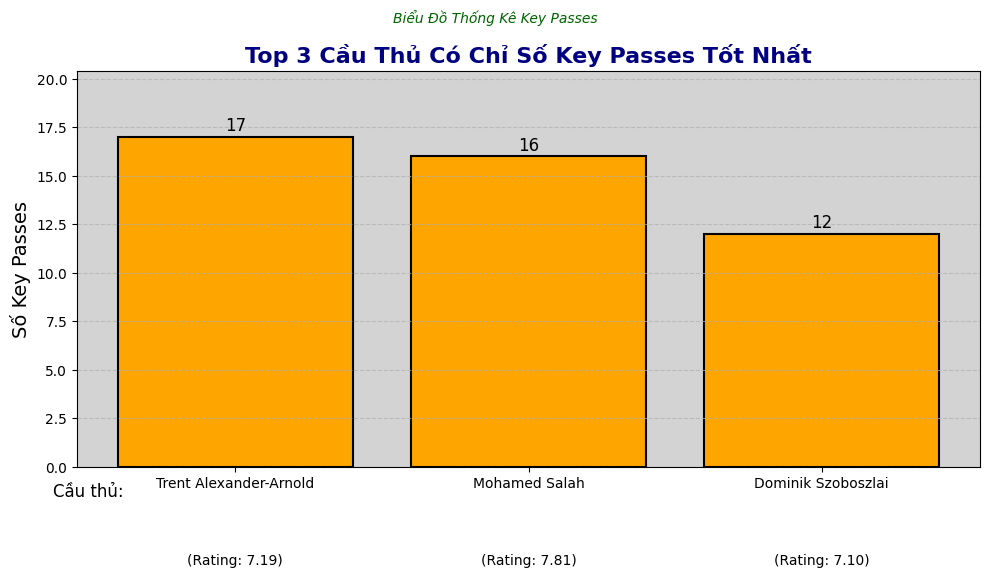

Top 3 cầu thủ có chỉ số keyPasses tốt nhất:
Tên: Trent Alexander-Arnold, Số keyPasses: 17.0, Điểm đánh giá: 7.19
Tên: Mohamed Salah, Số keyPasses: 16.0, Điểm đánh giá: 7.81
Tên: Dominik Szoboszlai, Số keyPasses: 12.0, Điểm đánh giá: 7.10


In [8]:
# Chuyển đổi kiểu dữ liệu cho chỉ số keyPasses
data_cleaned.loc[:, 'keyPasses'] = pd.to_numeric(data_cleaned['keyPasses'], errors='coerce')

# Sắp xếp DataFrame theo chỉ số keyPasses theo thứ tự giảm dần
sorted_key_passes = data.sort_values(by='keyPasses', ascending=False)

# Tính toán top 3 cầu thủ có chỉ số keyPasses tốt nhất
top_key_passes = sorted_key_passes.head(3)

# Vẽ biểu đồ cho top 3 cầu thủ có chỉ số keyPasses tốt nhất
plt.figure(figsize=(10, 6))
bars = plt.bar(top_key_passes['name'], top_key_passes['keyPasses'], color='orange', edgecolor='black', linewidth=1.5)
plt.title('Top 3 Cầu Thủ Có Chỉ Số Key Passes Tốt Nhất', fontsize=16, fontweight='bold', color='navy')
plt.ylabel('Số Key Passes', fontsize=14)
plt.ylim(0, top_key_passes['keyPasses'].max() * 1.2)  # Thiết lập giới hạn trục y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm giá trị keyPasses lên trên các cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.0f}', 
             ha='center', va='bottom', fontsize=12, color='black')

# Thêm nhãn rating bên dưới tên cầu thủ
for index, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, -4.5, f'(Rating: {top_key_passes["rating"].iloc[index]:.2f})', 
             ha='center', va='top', fontsize=10, color='black')

# Thêm nhãn cho trục x ở vị trí mong muốn
plt.text(-0.5, -0.8, 'Cầu thủ:', ha='center', va='top', fontsize=12, color='black')

# Chỉnh sửa độ sáng của nền
plt.gca().set_facecolor('lightgray')

# Thêm một tiêu đề phụ (subtitle)
plt.suptitle('Biểu Đồ Thống Kê Key Passes', fontsize=10, fontstyle='italic', color='darkgreen')

# Hiển thị biểu đồ
plt.tight_layout()  # Đảm bảo không bị chồng chéo
plt.show()

# In ra thông tin top 3 cầu thủ có chỉ số keyPasses tốt nhất
print("Top 3 cầu thủ có chỉ số keyPasses tốt nhất:")
for index, row in top_key_passes.iterrows():
    print(f"Tên: {row['name']}, Số keyPasses: {row['keyPasses']}, Điểm đánh giá: {row['rating']:.2f}")
